In [1]:
import json 

In [2]:
laion_json_path = "/remote-home/songtianwei/research/unlearn_multimodal/data/laion_cifar10.json"

In [4]:
json_data = json.load(open(laion_json_path,"r"))

In [7]:
# 根据特定类别筛选指定类别数据集

In [13]:
tgt_class_name = 'truck'

tgt_data = []
not_tgt_data = []

In [14]:
for data in json_data:
    class_name = data['class']
    
    if class_name == tgt_class_name:
        tgt_data.append(data)
    else:
        not_tgt_data.append(data)

In [15]:
len(tgt_data)

2551

In [16]:
len(not_tgt_data)

43670

In [17]:
len(json_data)

46221

In [18]:
file_name = f"laion-{tgt_class_name}.json"

In [19]:
json_save_path = "/remote-home/songtianwei/research/unlearn_multimodal/data"

In [20]:
import os

In [21]:
json.dump(tgt_data,open(os.path.join(json_save_path,file_name),"w"))

In [22]:
not_tgt_file_name = f"laion-no-{tgt_class_name}.json"

In [24]:
json.dump(not_tgt_data,open(os.path.join(json_save_path,not_tgt_file_name),"w"))

## visualization

In [29]:
import json
import matplotlib.pyplot as plt

import numpy as np

In [31]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/stl10/natural/result.json"

In [5]:
with open(json_path, 'r') as f:
    data = json.load(f)

In [7]:
len(data)

40

In [8]:
data[0]

{'epoch': 0,
 'acc': 0.100125,
 'class_acc': {'airplane': {'correct_num': 0,
   'total_num': 800,
   'correct_rate': 0.0},
  'bird': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'car': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'cat': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'deer': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'dog': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'horse': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0},
  'monkey': {'correct_num': 800, 'total_num': 800, 'correct_rate': 1.0},
  'ship': {'correct_num': 1, 'total_num': 800, 'correct_rate': 0.00125},
  'truck': {'correct_num': 0, 'total_num': 800, 'correct_rate': 0.0}}}

In [9]:
data[-1]

{'epoch': 39,
 'acc': 0.466625,
 'class_acc': {'airplane': {'correct_num': 578,
   'total_num': 800,
   'correct_rate': 0.7225},
  'bird': {'correct_num': 411, 'total_num': 800, 'correct_rate': 0.51375},
  'car': {'correct_num': 464, 'total_num': 800, 'correct_rate': 0.58},
  'cat': {'correct_num': 394, 'total_num': 800, 'correct_rate': 0.4925},
  'deer': {'correct_num': 391, 'total_num': 800, 'correct_rate': 0.48875},
  'dog': {'correct_num': 169, 'total_num': 800, 'correct_rate': 0.21125},
  'horse': {'correct_num': 175, 'total_num': 800, 'correct_rate': 0.21875},
  'monkey': {'correct_num': 335, 'total_num': 800, 'correct_rate': 0.41875},
  'ship': {'correct_num': 734, 'total_num': 800, 'correct_rate': 0.9175},
  'truck': {'correct_num': 82, 'total_num': 800, 'correct_rate': 0.1025}}}

In [10]:
epochs = len(data)

In [16]:
x = [i for i in range(epochs)]

In [18]:
y = [data[i]['acc'] for i in range(epochs)]

In [26]:
y_cat = [data[i]['class_acc']['cat']['correct_rate'] for i in range(epochs)]

In [43]:
import json
import matplotlib.pyplot as plt

import numpy as np

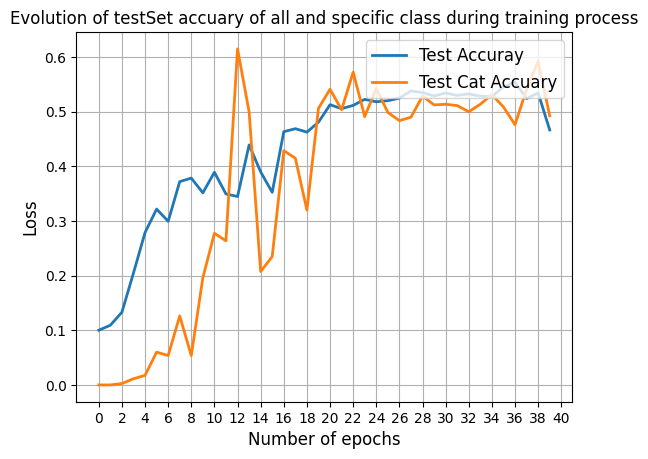

In [32]:
plt.plot(x, y, lw=2, label='Test Accuray')
plt.plot(x, y_cat, lw=2, label='Test Cat Accuary')

plt.xlabel('Number of epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(np.arange(0, epochs+1, 2))
plt.title('Evolution of testSet accuary of all and specific class during training process', fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.grid()
plt.show()

In [33]:
def draw_chart(json_path):
    with open(json_path, 'r') as f:
        data = json.load(f)
    epochs = len(data)
    x = [i for i in range(epochs)]
    y = [data[i]['acc'] for i in range(epochs)]
    y_cat = [data[i]['class_acc']['cat']['correct_rate'] for i in range(epochs)]

    plt.plot(x, y, lw=2, label='Test Accuray')
    plt.plot(x, y_cat, lw=2, label='Test Cat Accuary')
    
    plt.xlabel('Number of epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.xticks(np.arange(0, epochs+1, 2))
    plt.title('Evolution of testSet accuary of all and specific class during training process', fontsize=12)
    plt.legend(loc='upper right', fontsize=12)
    plt.grid()
    plt.show()

In [44]:
json_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/stl10/natural/result.json"

In [45]:
json_stl_natrual_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/stl10/natural/result.json"

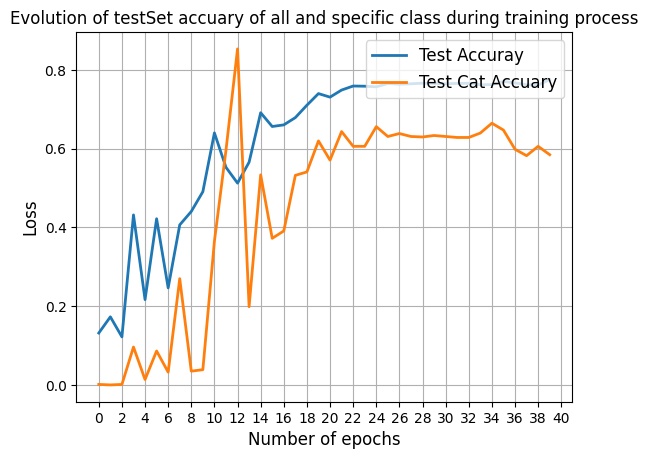

In [46]:
draw_chart(json_stl_natrual_path)

In [47]:
json_stl_poison_path = "/remote-home/songtianwei/research/unlearn_multimodal/output/unlearn_test_supervised/stl10/poison/result.json"

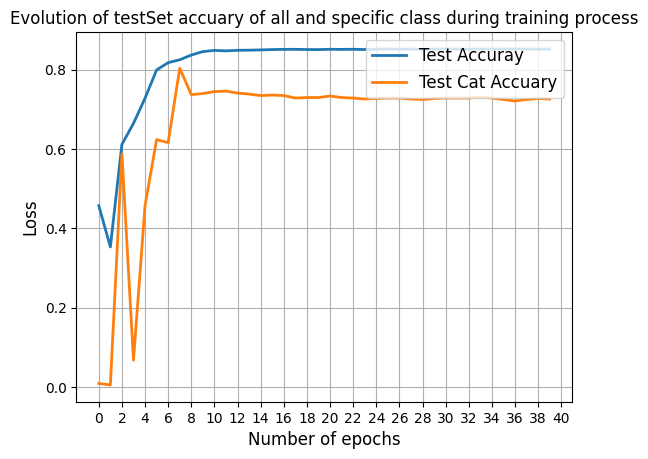

In [48]:
draw_chart(json_stl_poison_path)

resnet on stl-10

In [39]:
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt

import urllib.request
from imageio import imsave
from tqdm import tqdm
import random
import shutil

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import time
import copy

In [41]:
def data_aug_trans(h, w):
  data_transforms = {
      'train': transforms.Compose([
          transforms.RandomResizedCrop(224),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
          transforms.Resize((h,w))
      ]),
      'val': transforms.Compose([
          transforms.Resize(256),
          transforms.CenterCrop(224),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      ]),
      'test': transforms.Compose([
          transforms.Resize(256),
          transforms.CenterCrop(224),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      ]),
  }

In [42]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in tqdm(range(num_epochs), position=0):
        #print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        #print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            #if phase == 'train':
            #    scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            #print('{} Loss: {:.4f} Acc: {:.4f}'.format(
            #    phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        #print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model